## Leitura/Analise/Preparaçao dos Dados

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb

In [44]:
# df = pd.read_csv("ObesityDataSet.csv", sep=',')
df = pd.read_csv("ObesityDataSet.csv")

# Conversoes para Int
df.Age = df.Age.astype('int64')
# df.Height = df.Height.astype('int64')
df['Height'] = df['Height'].astype(float).round(2)
df.Weight = df.Weight.astype('int64')
df.FCVC = df.FCVC.astype('int64')
df.NCP = df.NCP.astype('int64')
df.CH2O = df.CH2O.astype('int64')
df.FAF = df.FAF.astype('int64')
df.TUE = df.TUE.astype('int64')

# Feature Map
df.Gender = df.Gender.replace({'Male': 0, 'Female': 1})
df.family_history_with_overweight = df.family_history_with_overweight.replace({'yes': 0, 'no': 1})
df.FAVC = df.FAVC.replace ({'yes': 0, 'no': 1})
df.CAEC = df.CAEC.replace ({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.SMOKE = df.SMOKE.replace({'yes': 0, 'no': 1})
df.SCC = df.SCC.replace({'yes': 0, 'no': 1})
df.CALC = df.CALC.replace({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.MTRANS = df.MTRANS.replace({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})
df.NObeyesdad = df.NObeyesdad.replace({'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Insufficient_Weight': 3, 
                                       'Obesity_Type_I': 4, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5})

#Informacoes do dataset após mudanças
df.info()
df.shape 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1.62,64,0,1,2,3,0,1,2,1,0,1,3,0,0
1,1,21,1.52,56,0,1,3,3,0,0,3,0,3,0,0,0,0
2,0,23,1.80,77,0,1,2,3,0,1,2,1,2,1,1,0,0
3,0,27,1.80,87,1,1,3,3,0,1,2,1,2,0,1,1,1
4,0,22,1.78,89,1,1,2,1,0,1,2,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131,0,0,3,3,0,1,1,1,1,0,0,0,5
2107,1,21,1.75,133,0,0,3,3,0,1,2,1,1,0,0,0,5
2108,1,22,1.75,133,0,0,3,3,0,1,2,1,1,0,0,0,5
2109,1,24,1.74,133,0,0,3,3,0,1,2,1,1,0,0,0,5


In [45]:
# sb.pairplot(df)

In [46]:
X = np.array(df.drop('NObeyesdad', axis=1))
X

array([[ 1.  , 21.  ,  1.62, ...,  1.  ,  3.  ,  0.  ],
       [ 1.  , 21.  ,  1.52, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , 23.  ,  1.8 , ...,  1.  ,  1.  ,  0.  ],
       ...,
       [ 1.  , 22.  ,  1.75, ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 24.  ,  1.74, ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 23.  ,  1.74, ...,  0.  ,  0.  ,  0.  ]])

## KMEANS

In [47]:
kmeans = KMeans(n_clusters = 3, random_state=0) #Parametrizando K-Means com 3 Clusters

kmeans.fit(X) # Treino do modelo com os Dados

c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [48]:
kmeans.cluster_centers_ # Exibindo os Centroids

array([[4.51253482e-01, 2.50208914e+01, 1.74189415e+00, 1.16394150e+02,
        2.78551532e-03, 1.39275766e-02, 2.43175487e+00, 2.72144847e+00,
        2.50696379e-02, 9.76323120e-01, 1.69220056e+00, 9.97214485e-01,
        4.98607242e-01, 1.79665738e-01, 3.88579387e-01, 3.44011142e-01],
       [3.84517766e-01, 2.55393401e+01, 1.70442893e+00, 8.23883249e+01,
        1.21827411e-01, 1.20558376e-01, 2.05076142e+00, 2.29314721e+00,
        2.22081218e-01, 9.82233503e-01, 1.76649746e+00, 9.75888325e-01,
        8.07106599e-01, 3.95939086e-01, 1.20558376e+00, 6.97969543e-01],
       [6.87603306e-01, 2.06876033e+01, 1.65016529e+00, 5.54528926e+01,
        4.74380165e-01, 2.31404959e-01, 2.16528926e+00, 2.58842975e+00,
        5.09090909e-01, 9.78512397e-01, 1.66611570e+00, 8.76033058e-01,
        9.20661157e-01, 6.01652893e-01, 1.25619835e+00, 3.86776860e-01]])

In [49]:
kmeans.labels_ #Clusters

array([2, 2, 1, ..., 0, 0, 0])

In [50]:
df['K-classes'] = kmeans.labels_  #Criacao de nova coluna com os labels
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,K-classes
0,1,21,1.62,64,0,1,2,3,0,1,2,1,0,1,3,0,0,2
1,1,21,1.52,56,0,1,3,3,0,0,3,0,3,0,0,0,0,2
2,0,23,1.80,77,0,1,2,3,0,1,2,1,2,1,1,0,0,1
3,0,27,1.80,87,1,1,3,3,0,1,2,1,2,0,1,1,1,1
4,0,22,1.78,89,1,1,2,1,0,1,2,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131,0,0,3,3,0,1,1,1,1,0,0,0,5,0
2107,1,21,1.75,133,0,0,3,3,0,1,2,1,1,0,0,0,5,0
2108,1,22,1.75,133,0,0,3,3,0,1,2,1,1,0,0,0,5,0
2109,1,24,1.74,133,0,0,3,3,0,1,2,1,1,0,0,0,5,0


In [51]:
# sb.pairplot(df,hue='NObeyesdad')

In [52]:
# sb.pairplot(df, hue='K-classes')

### Calculo WCSSE e Elbow

In [53]:
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 1532343.1124023686
2 504744.61048877385
3 284235.2160780595
4 199628.6880399599


c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

5 162151.1101220699
6 129073.49841188153
7 102779.85658598124
8 93735.9027859475
9 86375.33672588889
10 80300.4295656891


c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


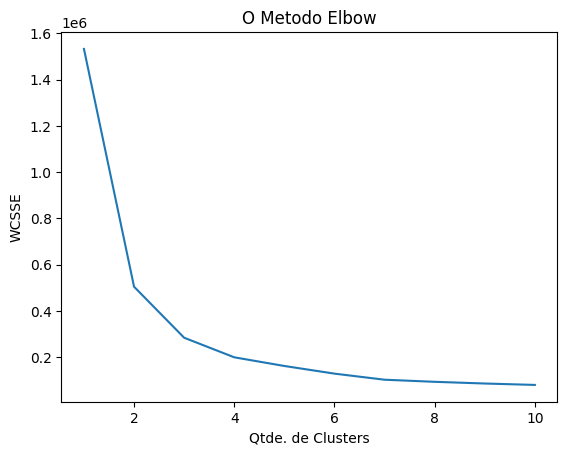

In [54]:
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

<Axes: >

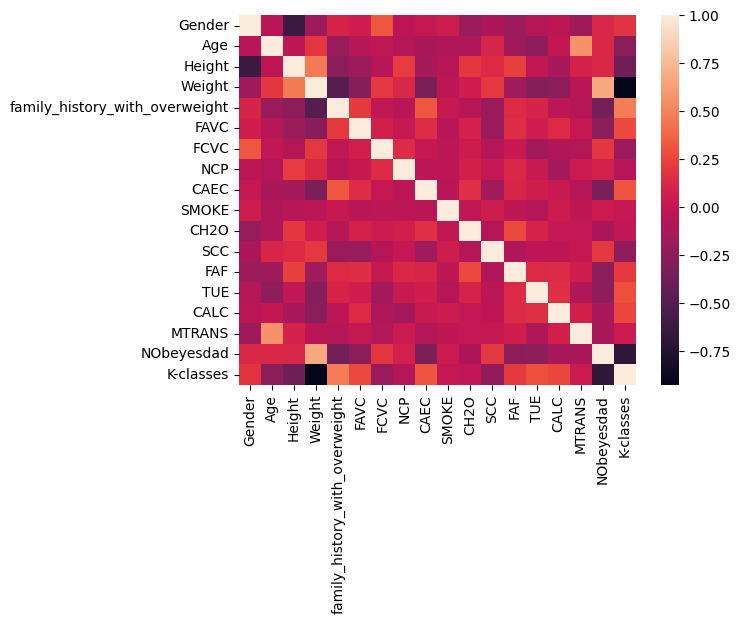

In [55]:
# # Criando a matriz de correlação
# correlation_matrix = df.corr()

# # Criando um heatmap usando Seaborn
# plt.figure(figsize=(12, 10))
# sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Matriz de Correlação')
# plt.show()

sb.heatmap(df.corr())


### Testes

In [71]:
kmeans = KMeans(n_clusters = 3, random_state=0) #Parametrizando K-Means com 3 Clusters

kmeans.fit(X) # Treino do modelo com os Dados

c:\Users\Cliente\Desktop\walmir\venve\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [70]:
usuario= [[1,21,1.62,64,0,1,2,3,0,1,2,1,0,1,3,0]] #classe 2
kmeans.predict(usuario)

array([2])

In [69]:
usuario2 = [[0,	23,	1,	77,	0,	1,	2,	3,	0,	1,	2,	1,	2,	1,	1,	0	] ] #classe 1
kmeans.predict(usuario2)

array([1])

In [68]:
usuario3 =  [[1, 20, 1,	131,	0,	0,	3,	3,	0,	1,	1,	1,	1,	0,	0,	0,] ] #  classe 0
kmeans.predict(usuario3)

array([0])